### Imports
Packages needed for project

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../data')

import aggregate
import clean
import plot


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Sample
First look at data

In [97]:
initial_data = clean.read_file('../data/master.csv')
initial_data


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### Data Cleaning
Remove columns and records that will not be utilized. <br /> 
Additionally rename columns to allow for better human readablity.

In [98]:
data = clean.clean_data(initial_data, 2016, '5-14 years',
                            '05-14 years', ['country-year', 'HDI for year'])

data

,Country,Year,Sex,Age,Suicides,Population,Suicides_per_100K,Annual_GDP,GDP_per_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,05-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,05-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


### Initial Overview
Views of overall data without grouping or filters

<AxesSubplot:title={'left':'Global Suicide Rate'}, xlabel='Year', ylabel='Suicides per 100K'>

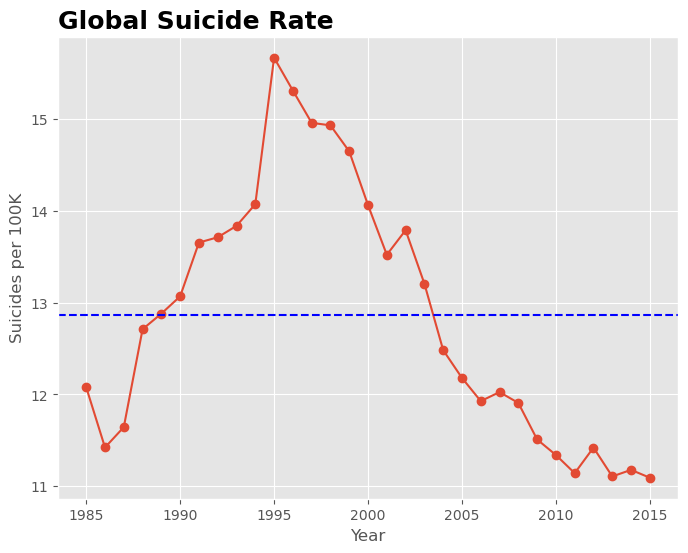

In [119]:
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


plot.annual_rate_plot(data, 'Global Suicide Rate', 'Year', 'Suicides per 100K')

Global Map View

In [107]:
country_total = aggregate.column_total(data, 'Country')

plot.world_map(country_total)

### Male vs Female
Review entire dataset with male vs female by year

<AxesSubplot:title={'left':'Suicide Rate (by Gender)'}, xlabel='Year', ylabel='Suicides per 100K'>

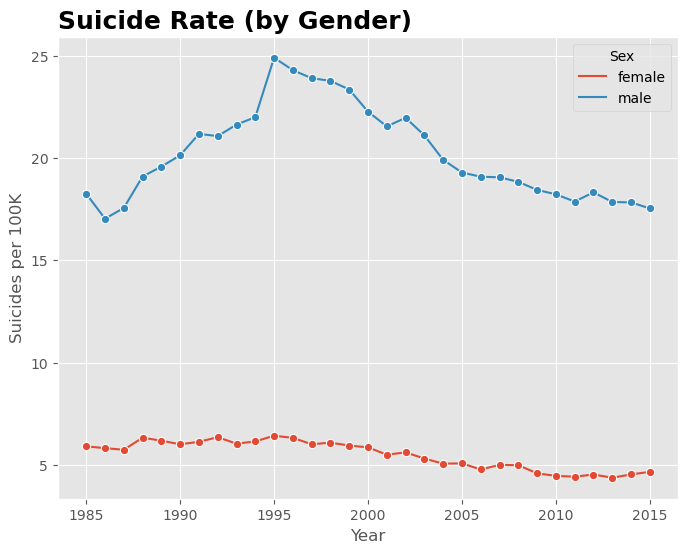

In [124]:
male_female = aggregate.coloumn_mean(data, ['Year', 'Sex'])

plot.line_plot(male_female, 'Year', 'Suicides_per_100K', 'Suicide Rate (by Gender)', 'Year', 'Suicides per 100K', 'Sex')

### Males and Females V2
Seperate veiw of male vs female with medians and ranges

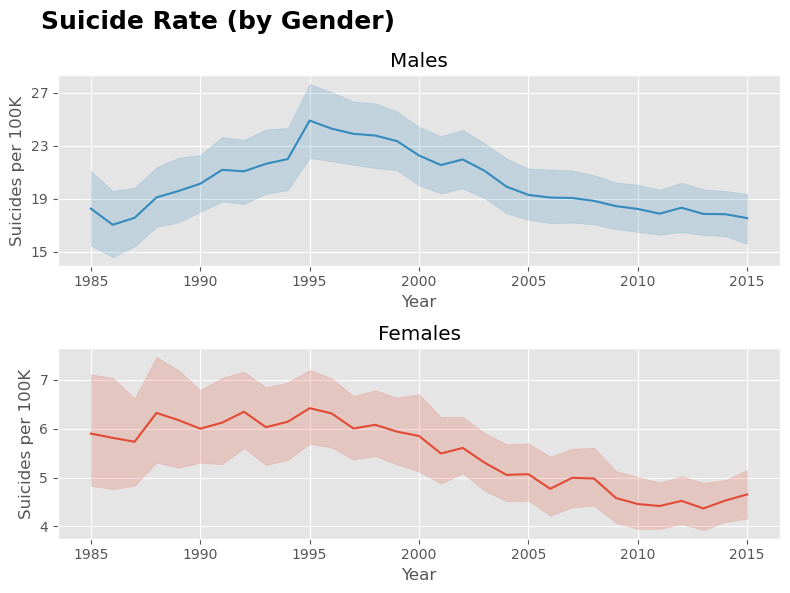

In [122]:
males = aggregate.column_filter(data, 'Sex', 'male')
females = aggregate.column_filter(data, 'Sex', 'female')

plot.two_plot(males, 'Males', females, 'Females', 'Suicide Rate (by Gender)', 'Year', 'Suicides per 100K', colors)

### Generations

<AxesSubplot:title={'left':'Suicide Rate (by Generation)'}, xlabel='Year', ylabel='Suicides per 100K'>

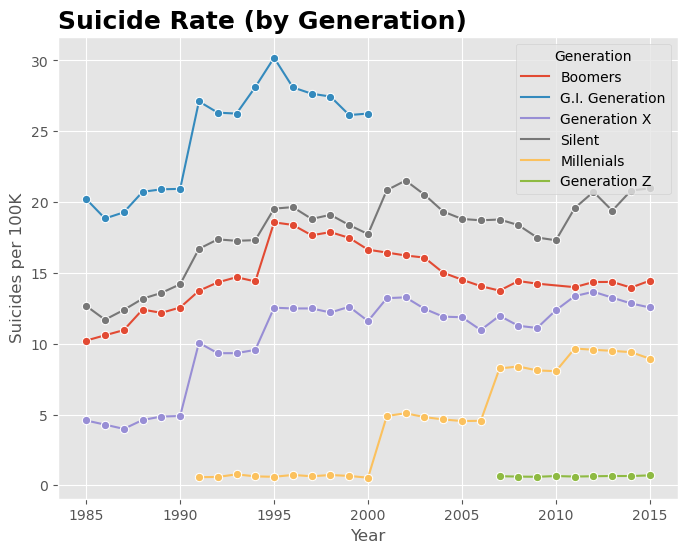

In [127]:
generations = aggregate.coloumn_mean(data, ['Year', 'Generation'])

plot.line_plot(generations, 'Year', 'Suicides_per_100K', 'Suicide Rate (by Generation)', 'Year', 'Suicides per 100K', 'Generation')

### Ages

<AxesSubplot:title={'left':'Suicide Rate (by Age)'}, xlabel='Year', ylabel='Suicides per 100K'>

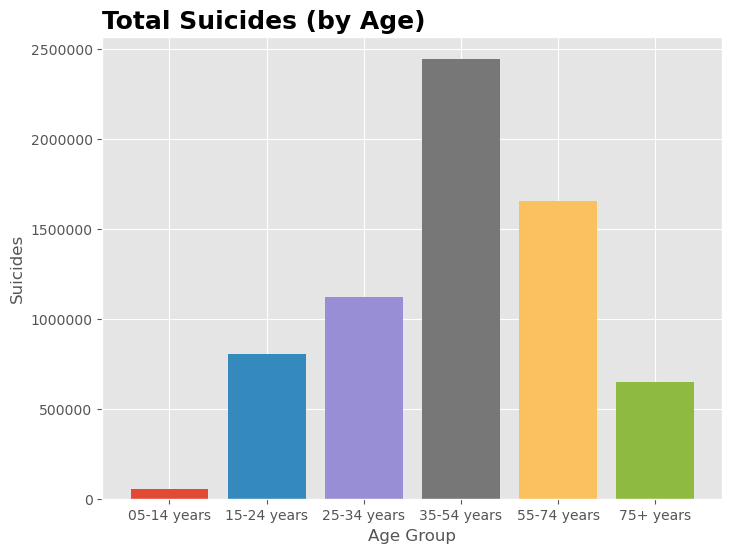

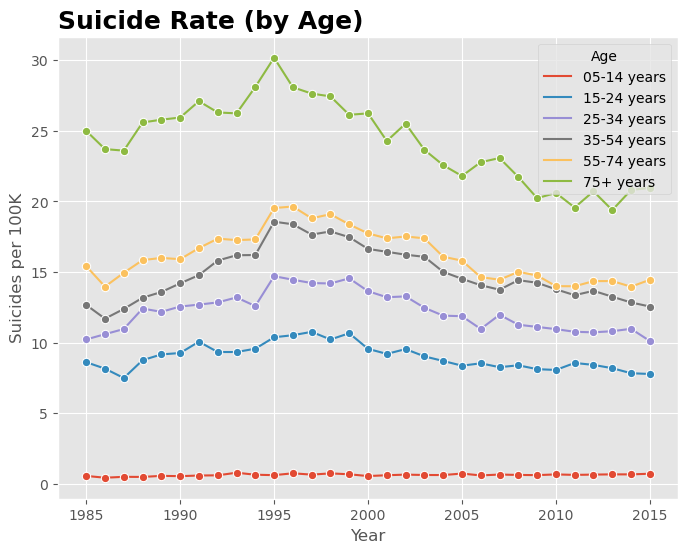

In [138]:
# Bar plot for total suicides by age
ages_grouped = aggregate.column_total(data, 'Age').sort_values('Age', ascending=True)
plot.bar_plot(ages_grouped, 'Age', 'Suicides', 'Total Suicides (by Age)', 'Age Group', 'Suicides', colors)

# Line plot for mean by age
ages = aggregate.coloumn_mean(data, ['Year', 'Age'])
plot.line_plot(ages, 'Year', 'Suicides_per_100K', 'Suicide Rate (by Age)', 'Year', 'Suicides per 100K', 'Age')

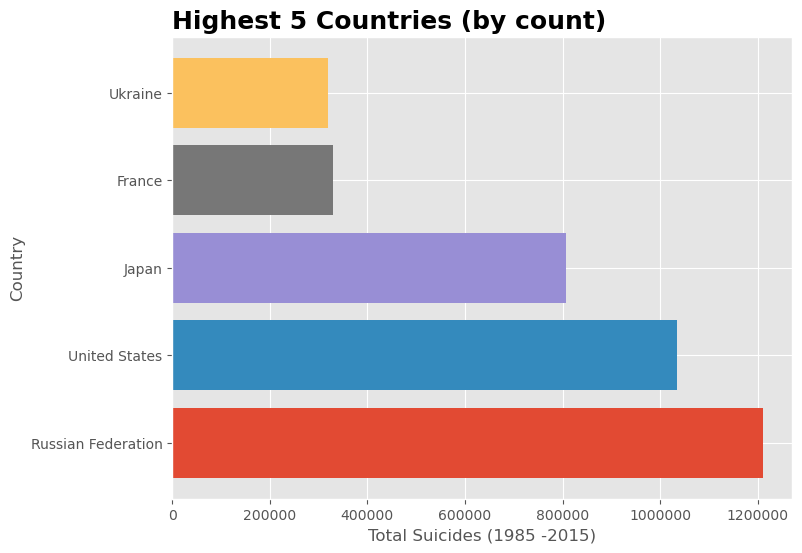

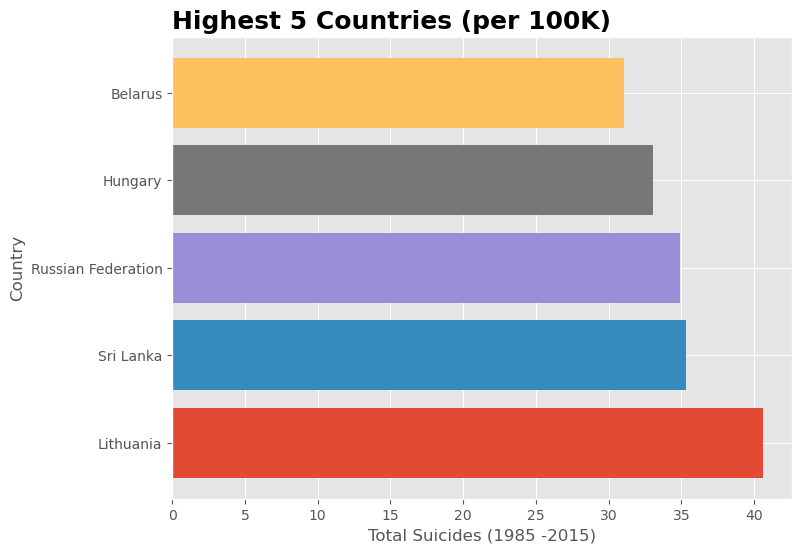

In [147]:
high_five = country_total.sort_values('Suicides', ascending=False)[:5]




plot.hbar_plot(high_five, 'Country', 'Suicides', 'Highest 5 Countries (by count)', 'Total Suicides (1985 -2015)', 'Country', colors)

high_five_ratio = data['Suicides_per_100K'].groupby(data.Country).mean().sort_values(ascending=False)[:5]

plot.ser_hbar_plot(high_five_ratio, 'Highest 5 Countries (per 100K)', 'Total Suicides (1985 -2015)', 'Country', colors)